# Import libraries

In [18]:
import os
import cv2
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from tensorflow.keras.metrics import Recall,Precision 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img



# Read&load data..

In [3]:
train_direct=r"C:\Users\mwael\OneDrive\Desktop\home\course\pneumonia\train"
labels = ['NORMAL','PNEUMONIA']
print(os.listdir(train_direct)) 

['NORMAL', 'PNEUMONIA']


In [4]:
train_normal=os.path.join(train_direct,"NORMAL")
train_pneumonia=os.path.join(train_direct,"PNEUMONIA")
print("no.PNEUMONIA:" , len(os.listdir(train_pneumonia)))
print("no.NORMAL:" , len(os.listdir(train_normal)))

no.PNEUMONIA: 4265
no.NORMAL: 4302


# Augmantaing

In [10]:
# Input_folder=r"C:\Users\mwael\OneDrive\Desktop\home\course\pneumonia\train\NORMAL"
# Output_folder=r"C:\Users\mwael\OneDrive\Desktop\home\course\pneumonia\train\NORMAL"

In [11]:
# datagen=ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

In [ ]:
# for file in os.listdir(Input_folder):
#     img_path=os.path.join(Input_folder,file)
#     img=load_img(img_path)
#     img=img_to_array(img)
#     img=img.reshape((1,)+img.shape)

#     i=0

#     for batch in datagen.flow(img,batch_size=1,save_to_dir=Output_folder,save_prefix="_aug",save_format="jpg"):

#         i=+1

#         if i>=2:
#             break 
        


In [5]:
sample_normal=os.listdir(train_normal) [0]
sample_pneumonia=os.listdir(train_pneumonia) [0] 

Normal example-->>


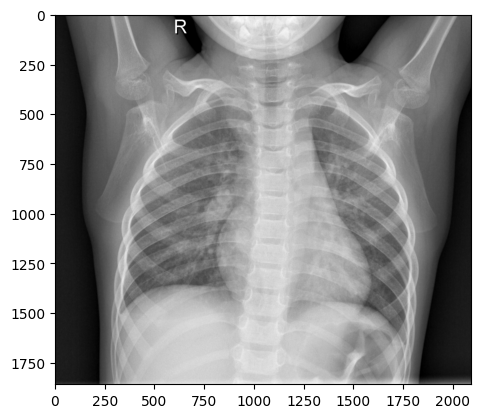

In [6]:
normal_image=os.path.join(train_normal,sample_normal)
img = cv2.imread(normal_image)
print("Normal example-->>")
plt.imshow(img)

In [7]:
type(img)

numpy.ndarray

In [8]:
img.shape

(1858, 2090, 3)

Pneumonia image-->>


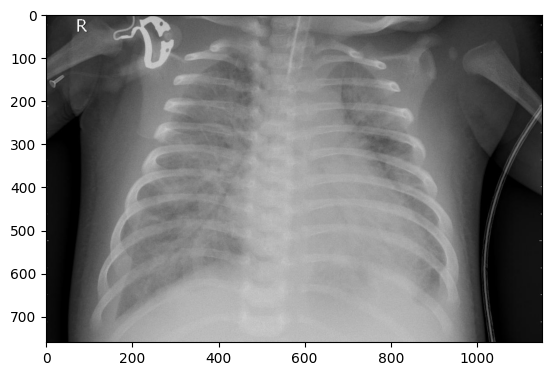

In [9]:
Pneumonia_image=os.path.join(train_pneumonia,sample_pneumonia)
img=cv2.imread(Pneumonia_image)
print("Pneumonia image-->>")
plt.imshow(img)

In [10]:
type(img)

numpy.ndarray

In [11]:
img.shape

(760, 1152, 3)

# split data into target & data

In [5]:
data =[]
target=[] 
for i in labels:
    path=os.path.join(train_direct,i)
    for img in os.listdir(path):
        one_image=cv2.imread(os.path.join(path,img))
        if one_image is not None:
            resize_img=cv2.resize(one_image,(128,128))
            data.append(resize_img)
            target.append(labels.index(i))   

In [6]:
type(data)

list

In [7]:
type(target)

list

In [8]:
data=np.array(data)
target=np.array(target)
type(target),type(data)

(numpy.ndarray, numpy.ndarray)

In [9]:
data.shape,target.shape

((8567, 128, 128, 3), (8567,))

In [10]:
data_flat=data.reshape(data.shape[0],-1)

# NN(Neural Network)

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential 


In [12]:
model_NN=Sequential([
    Conv2D(64,(3,3),activation="relu",input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu",),
    MaxPooling2D((2,2)),
])
model_NN.summary()

c:\Users\mwael\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,720 (151.25 KB)

 Trainable params: 38,720 (151.25 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_NN.add(Flatten())
model_NN.add(Dense(255, activation="relu"))
model_NN.add(Dense(128, activation="relu"))
model_NN.add(Dense(128, activation="relu"))
model_NN.add(Dense(64, activation="relu"))
model_NN.add(Dense(64, activation="relu"))
model_NN.add(Dense(64, activation="relu"))
model_NN.add(Dense(32, activation="relu"))
model_NN.add(Dense(16, activation="relu"))
model_NN.add(Dense(1, activation="sigmoid"))

model_NN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 255)            │    14,688,255 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,795,456 (56.44 MB)

 Trainable params: 14,795,456 (56.44 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
        Precision(name="precision"),
        Recall(name="recall"),"accuracy"
             ])


In [20]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=42)

In [21]:
model_NN.fit(x_train, y_train, epochs=10, batch_size=8) 

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 257s 336ms/step - accuracy: 0.7668 - loss: 1.1064 - precision: 0.7556 - recall: 0.8037
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 263s 350ms/step - accuracy: 0.9013 - loss: 0.2382 - precision: 0.8983 - recall: 0.9089
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 266s 353ms/step - accuracy: 0.9492 - loss: 0.1431 - precision: 0.9499 - recall: 0.9444
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 269s 357ms/step - accuracy: 0.9597 - loss: 0.1260 - precision: 0.9593 - recall: 0.9579
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 267s 355ms/step - accuracy: 0.9649 - loss: 0.0950 - precision: 0.9644 - recall: 0.9664
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 275s 366ms/step - accuracy: 0.9742 - loss: 0.0776 - precision: 0.9678 - recall: 0.9808
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 279s 369ms/step - accuracy: 0.9471 - loss: 0.1517 - precision: 0.9364 - recall: 0.9543
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 273s 363ms/step - accuracy: 0.9692 - loss: 0.1072 - precision: 0.9664 -

In [22]:
model_NN.save("pneunonia_expert.keras")

In [23]:
from keras.models import load_model
model_nn=load_model(r"C:\Users\mwael\OneDrive\Desktop\home\course\pneumonia\pneunonia_expert.keras")

In [24]:
y_pred = model_nn.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step


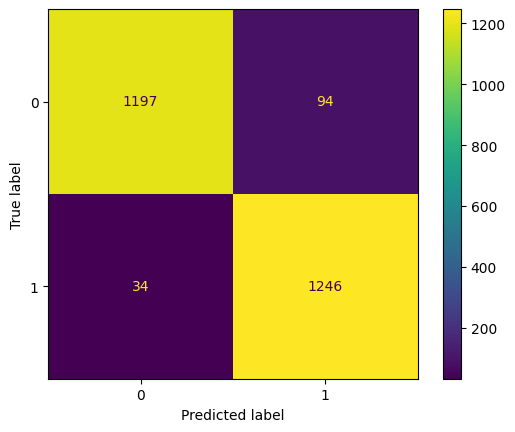

In [25]:
disp.plot()
plt.show()